0.0037897219929072506 870


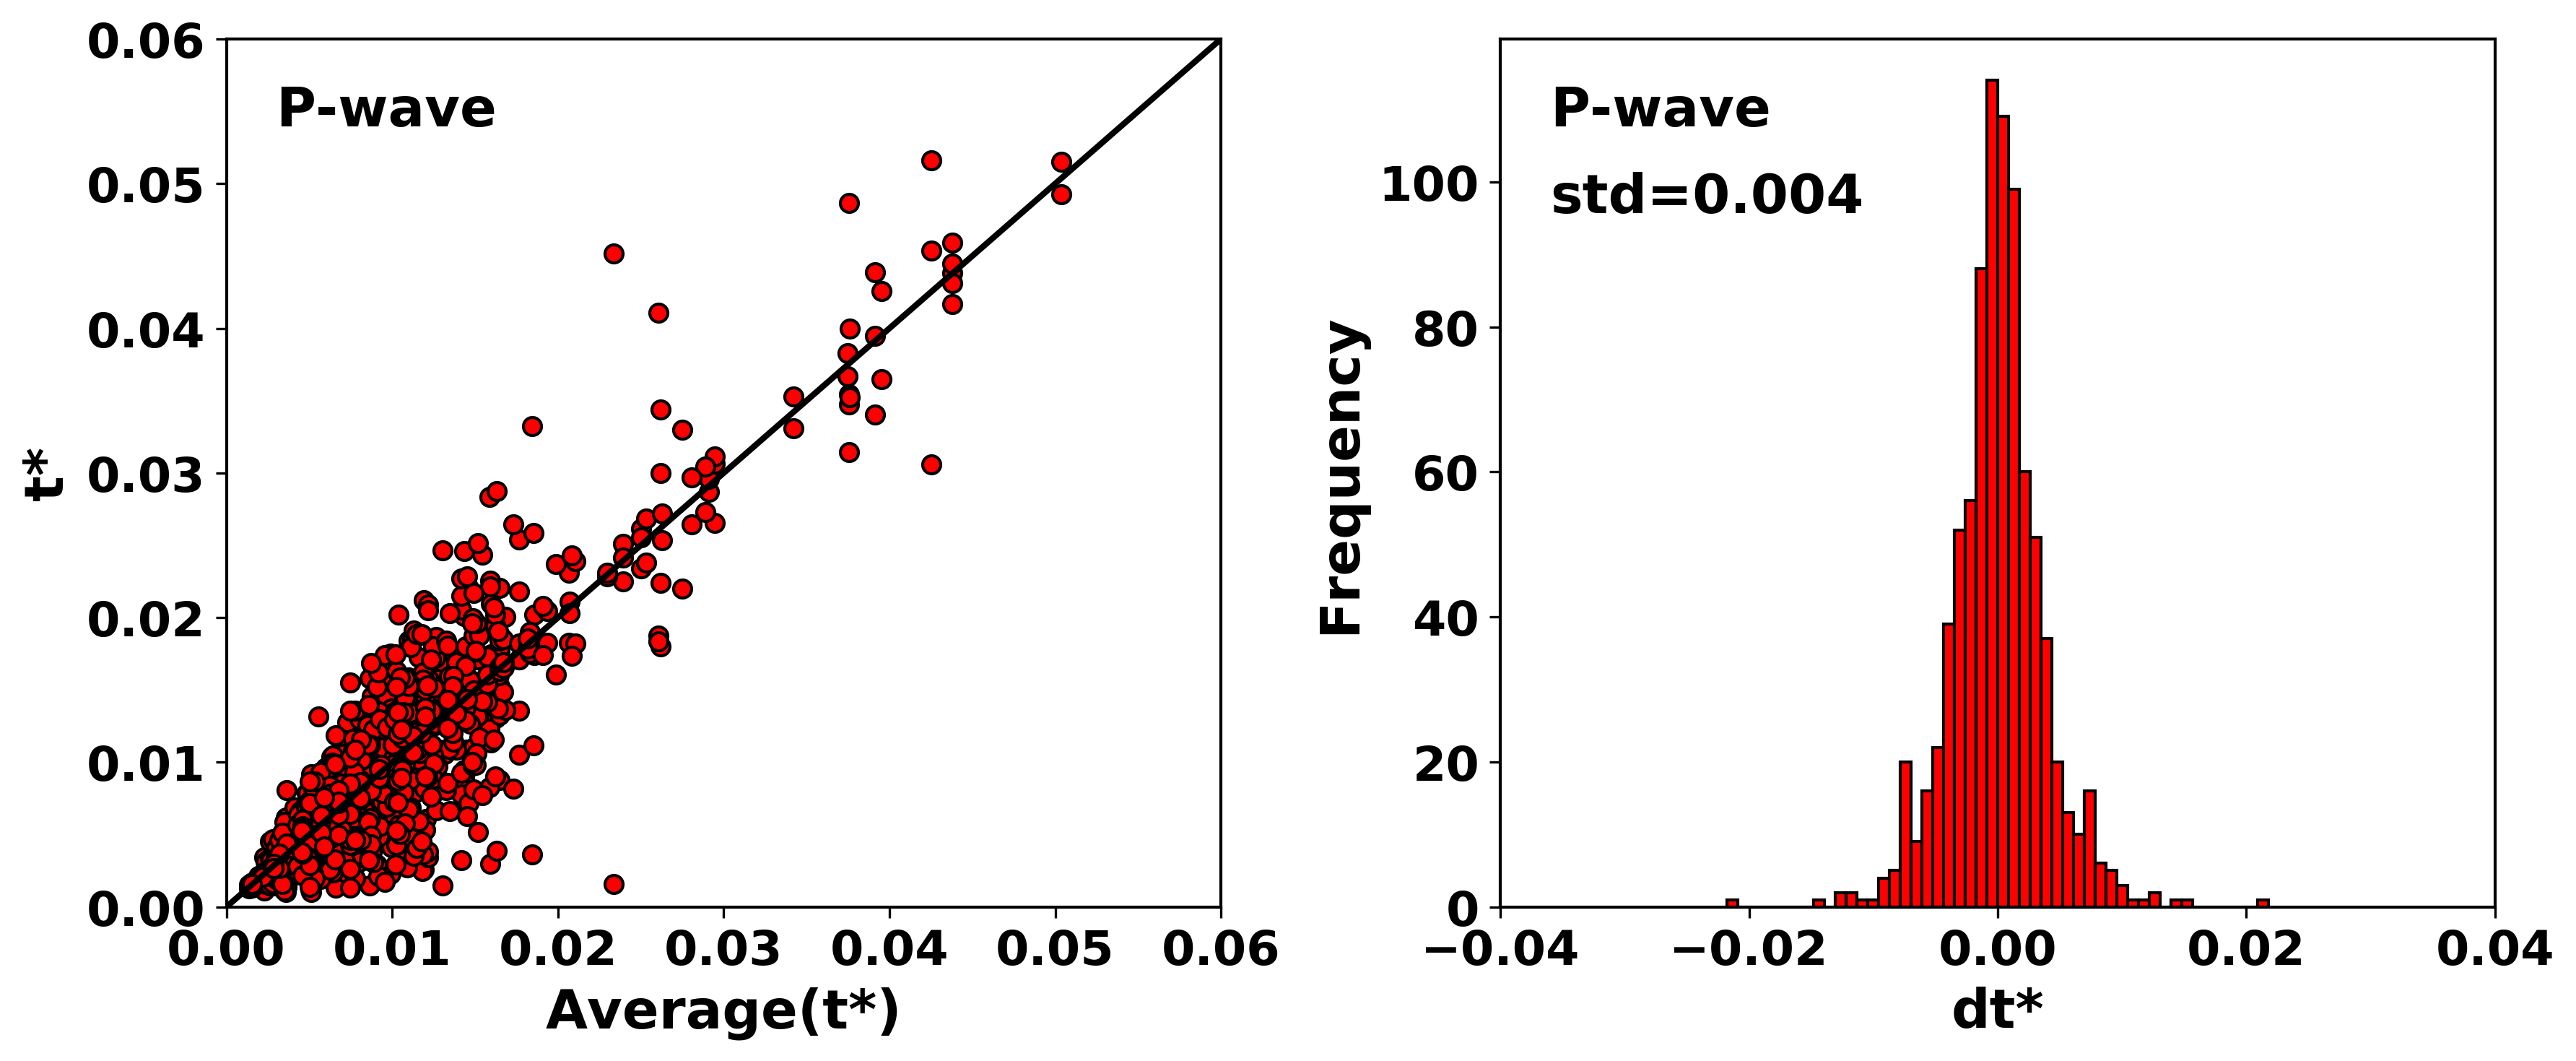

In [18]:
#!/usr/bin/env python
# coding: utf-8
"""
HJ@USC
2018-10-25
event.car: format
evid lat lon dep x y mag

absolute tstar phase file: format 
#	10338	1
G01	0.04244	0.8	P
G03	0.00368	0.8	P
G04	0.04404	0.8	P
G06	0.04924	0.8	P

intend to estimate tstar uncertainty
"""
import numpy as np
import matplotlib.pyplot as plt
import random
import os
events = np.loadtxt('event.car')
filename='../1PlotStationTstarMeasurements/Output/P_tstar_selected.dat' #after select Q<1500
# filename='../1PlotStationTstarMeasurements/Input/tstar_P_1.28sSNR3.dat' # raw tstar
threshold_evnum=2
dx,dy,dz = 0.2,0.2,0.2 # km
xmin,xmax = -1000,1000  # km
ymin,ymax = -1000,1000
zmin,zmax = -1000,1000
nxcell=int(np.ceil((xmax-xmin)/dx))
nycell=int(np.ceil((ymax-ymin)/dy))
nzcell=int(np.ceil((zmax-zmin)/dz))
ev_x_total = []
ev_y_total = []
xyzcell = {}

# read tstar
with open(filename,'r') as f:
    temp=f.read().splitlines()
    EVENT={}
    EVID=[]
    STANAME=[]
    for lin in temp:
        line=lin.split()
        if line[0]=="#":
            evid=line[1]
            EVID.append(evid)
        else:
            staname=line[0]
            tstar=line[1]
            qual=line[2]
            phase=line[3]
            EVENT[evid+"_"+staname]=float(tstar)  
            if staname not in STANAME:
                STANAME.append(staname)
            
# find any cell with mutiple events
for ev in events:
    evid = str(int(ev[0]))
    if evid in EVID:
        lat = ev[1]
        lon = ev[2]
        ev_dep = ev[3]
        ev_x,ev_y = ev[4],ev[5]
        ev_x_total.append(ev_x)
        ev_y_total.append(ev_y)
        #if (ev_x>region_x[0] and ev_x<region_x[1]) and (ev_y>region_y[0] and ev_y<region_y[1]):
        if True:
            ix,iy,iz=int(np.ceil((ev_x-xmin)/dx)),int(np.ceil((ev_y-ymin)/dy)),int(np.ceil((ev_dep-zmin)/dz))
            if (ix,iy,iz) in xyzcell:
                xyzcell[ix,iy,iz].append(evid)
            else:
                xyzcell[ix,iy,iz]=[evid]

#            
tstar_all={}
count_point=0
for i in xyzcell:
    temp = xyzcell[i]
    #compute average tstar
    for staname in STANAME:
        tstar=[]
        for evid in temp:
            key=evid+"_"+staname
            if key in EVENT:
                tstar.append(EVENT[key])
        if len(tstar)>=threshold_evnum:
            count_point=count_point+1
            tstar_all[count_point]=tstar
summary=np.array([[0,0,0],])
for i in tstar_all:
    temp=np.array(tstar_all[i]).reshape(-1,1)
    average_tstar=np.average(temp)
    average_tstar=np.ones_like(temp).reshape(-1,1)*average_tstar
    
    std_tstar=temp-average_tstar
    
    temp=np.hstack((temp,average_tstar,std_tstar))
    summary=np.concatenate((summary,temp))
print(np.std(summary[:,-1]),len(summary))
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.plot(summary[1:,1],summary[1:,0],'ro',markeredgecolor='black')
plt.plot([0,0.1],[0,0.1],'k-',linewidth='2')
plt.axis('image')
plt.axis([0,0.06,0,0.06])
plt.ylabel('t*')
plt.xlabel('Average(t*)')
plt.annotate('P-wave', xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
# plt.gca().set_aspect('auto')
plt.gca().set_aspect('auto')
plt.subplot(1,2,2)
plt.hist(summary[1:,2],color='red',edgecolor='black')
plt.xlabel('dt*')
plt.ylabel('Frequency')
stdt="{:.3f}".format(np.std(summary[:,-1]))
plt.xlim(-0.04,0.04)
# plt.text(-0.03,700,'P-wave',fontsize=18)
plt.annotate('P-wave', xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
plt.annotate('std='+stdt, xy=(0.05, 0.8), xycoords='axes fraction',fontsize=18)
# plt.axis('image')

plt.tight_layout()
plt.savefig('Pwave_tstar_uncertainty.png',dpi=300)
plt.pause(0.1)


0.005422129770487106 1043


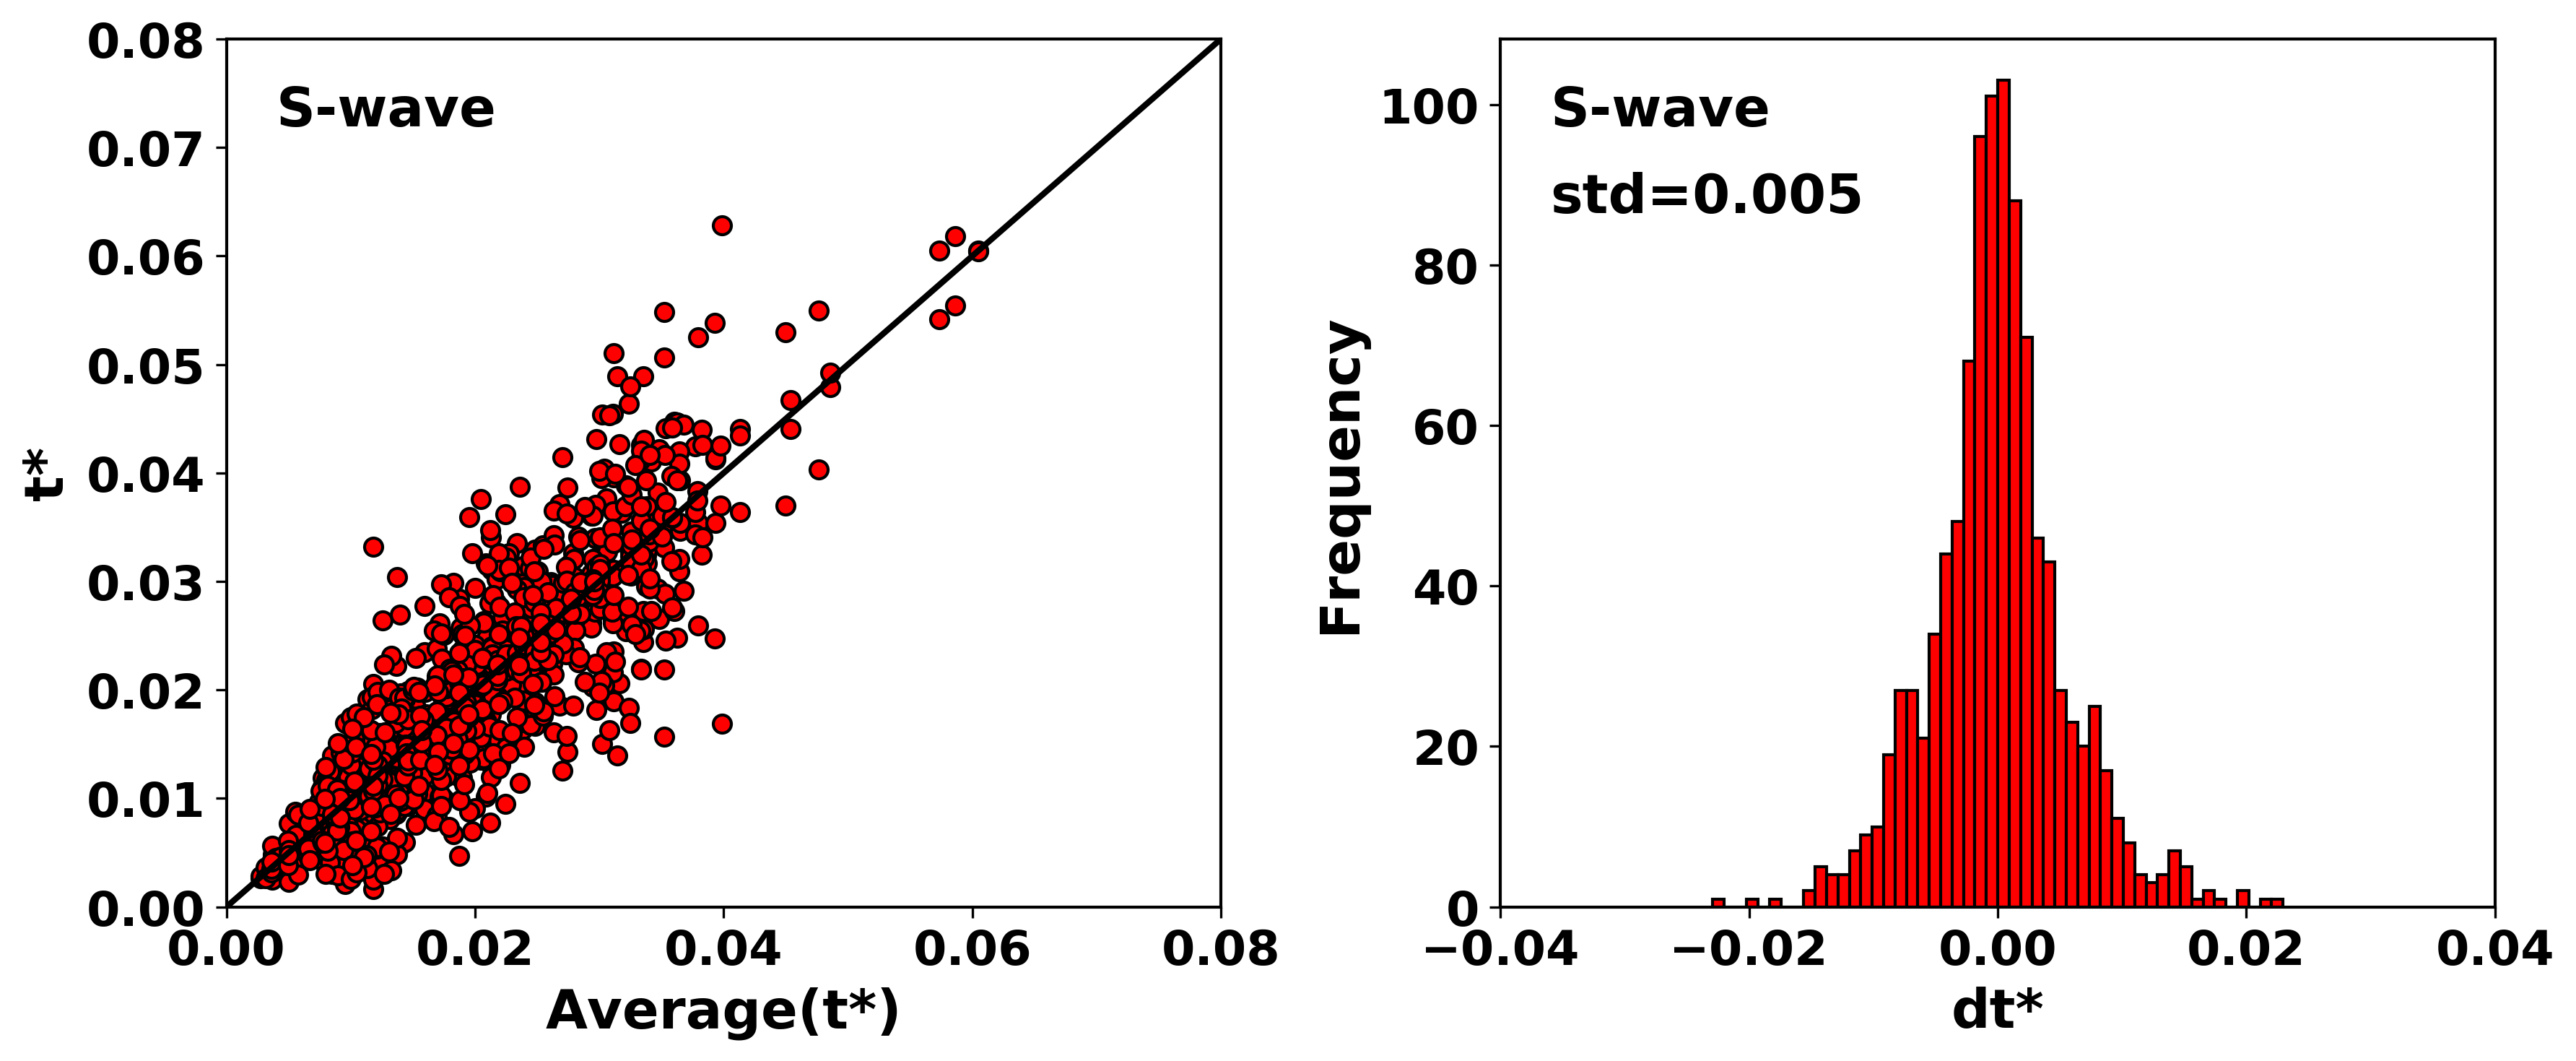

In [17]:
#!/usr/bin/env python
# coding: utf-8
"""
HJ@USC
2018-10-25
event.car: format
evid lat lon dep x y mag

absolute tstar phase file: format 
#	10338	1
G01	0.04244	0.8	P
G03	0.00368	0.8	P
G04	0.04404	0.8	P
G06	0.04924	0.8	P

intend to estimate tstar uncertainty
"""
import numpy as np
import matplotlib.pyplot as plt
import random
import os
events = np.loadtxt('event.car')
filename='../1PlotStationTstarMeasurements/Output/S_tstar_selected.dat' #tstar_S_2.56sSNR3.dat'  after select q<1500
# filename='../1PlotStationTstarMeasurements/Input/tstar_S_1.28sSNR3.dat' #tstar_S_2.56sSNR3.dat' raw
threshold_evnum=2
dx,dy,dz = 0.2,0.2,0.2 # km
xmin,xmax = -1000,1000  # km
ymin,ymax = -1000,1000
zmin,zmax = -1000,1000
nxcell=int(np.ceil((xmax-xmin)/dx))
nycell=int(np.ceil((ymax-ymin)/dy))
nzcell=int(np.ceil((zmax-zmin)/dz))
ev_x_total = []
ev_y_total = []
xyzcell = {}

# read tstar
with open(filename,'r') as f:
    temp=f.read().splitlines()
    EVENT={}
    EVID=[]
    STANAME=[]
    for lin in temp:
        line=lin.split()
        if line[0]=="#":
            evid=line[1]
            EVID.append(evid)
        else:
            staname=line[0]
            tstar=line[1]
            qual=line[2]
            phase=line[3]
            EVENT[evid+"_"+staname]=float(tstar)  
            if staname not in STANAME:
                STANAME.append(staname)
            
# find any cell with mutiple events
for ev in events:
    evid = str(int(ev[0]))
    if evid in EVID:
        lat = ev[1]
        lon = ev[2]
        ev_dep = ev[3]
        ev_x,ev_y = ev[4],ev[5]
        ev_x_total.append(ev_x)
        ev_y_total.append(ev_y)
        #if (ev_x>region_x[0] and ev_x<region_x[1]) and (ev_y>region_y[0] and ev_y<region_y[1]):
        if True:
            ix,iy,iz=int(np.ceil((ev_x-xmin)/dx)),int(np.ceil((ev_y-ymin)/dy)),int(np.ceil((ev_dep-zmin)/dz))
            if (ix,iy,iz) in xyzcell:
                xyzcell[ix,iy,iz].append(evid)
            else:
                xyzcell[ix,iy,iz]=[evid]

#            
tstar_all={}
count_point=0
for i in xyzcell:
    temp = xyzcell[i]
    #compute average tstar
    for staname in STANAME:
        tstar=[]
        for evid in temp:
            key=evid+"_"+staname
            if key in EVENT:
                tstar.append(EVENT[key])
        if len(tstar)>=threshold_evnum:
            count_point=count_point+1
            tstar_all[count_point]=tstar
summary=np.array([[0,0,0],])
for i in tstar_all:
    temp=np.array(tstar_all[i]).reshape(-1,1)
    average_tstar=np.average(temp)
    average_tstar=np.ones_like(temp).reshape(-1,1)*average_tstar
    
    std_tstar=temp-average_tstar
    
    temp=np.hstack((temp,average_tstar,std_tstar))
    summary=np.concatenate((summary,temp))
print(np.std(summary[:,-1]),len(summary))
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plt.plot(summary[1:,1],summary[1:,0],'ro',markeredgecolor='black')
plt.plot([0,0.1],[0,0.1],'k-',linewidth='2')
plt.axis('image')
plt.axis([0,0.08,0,0.08])
plt.ylabel('t*')
plt.xlabel('Average(t*)')
# plt.text(0.005,0.07,,fontsize=18)
plt.annotate('S-wave', xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
# plt.gca().set_aspect('auto')
plt.gca().set_aspect('auto')
plt.subplot(1,2,2)
plt.hist(summary[1:,2],color='red',edgecolor='black')
plt.xlabel('dt*')
plt.ylabel('Frequency')
plt.xlim(-0.04,0.04) 
# plt.text(-0.03,700,'P-wave',fontsize=18)
# plt.text(-0.03,175,,fontsize=18)
stdt="{:.3f}".format(np.std(summary[:,-1]))
plt.annotate('S-wave', xy=(0.05, 0.9), xycoords='axes fraction',fontsize=18)
plt.annotate('std='+stdt, xy=(0.05, 0.8), xycoords='axes fraction',fontsize=18)
# plt.axis('image')

plt.tight_layout()
plt.savefig('Swave_tstar_uncertainty.png',dpi=300)
plt.pause(0.1)


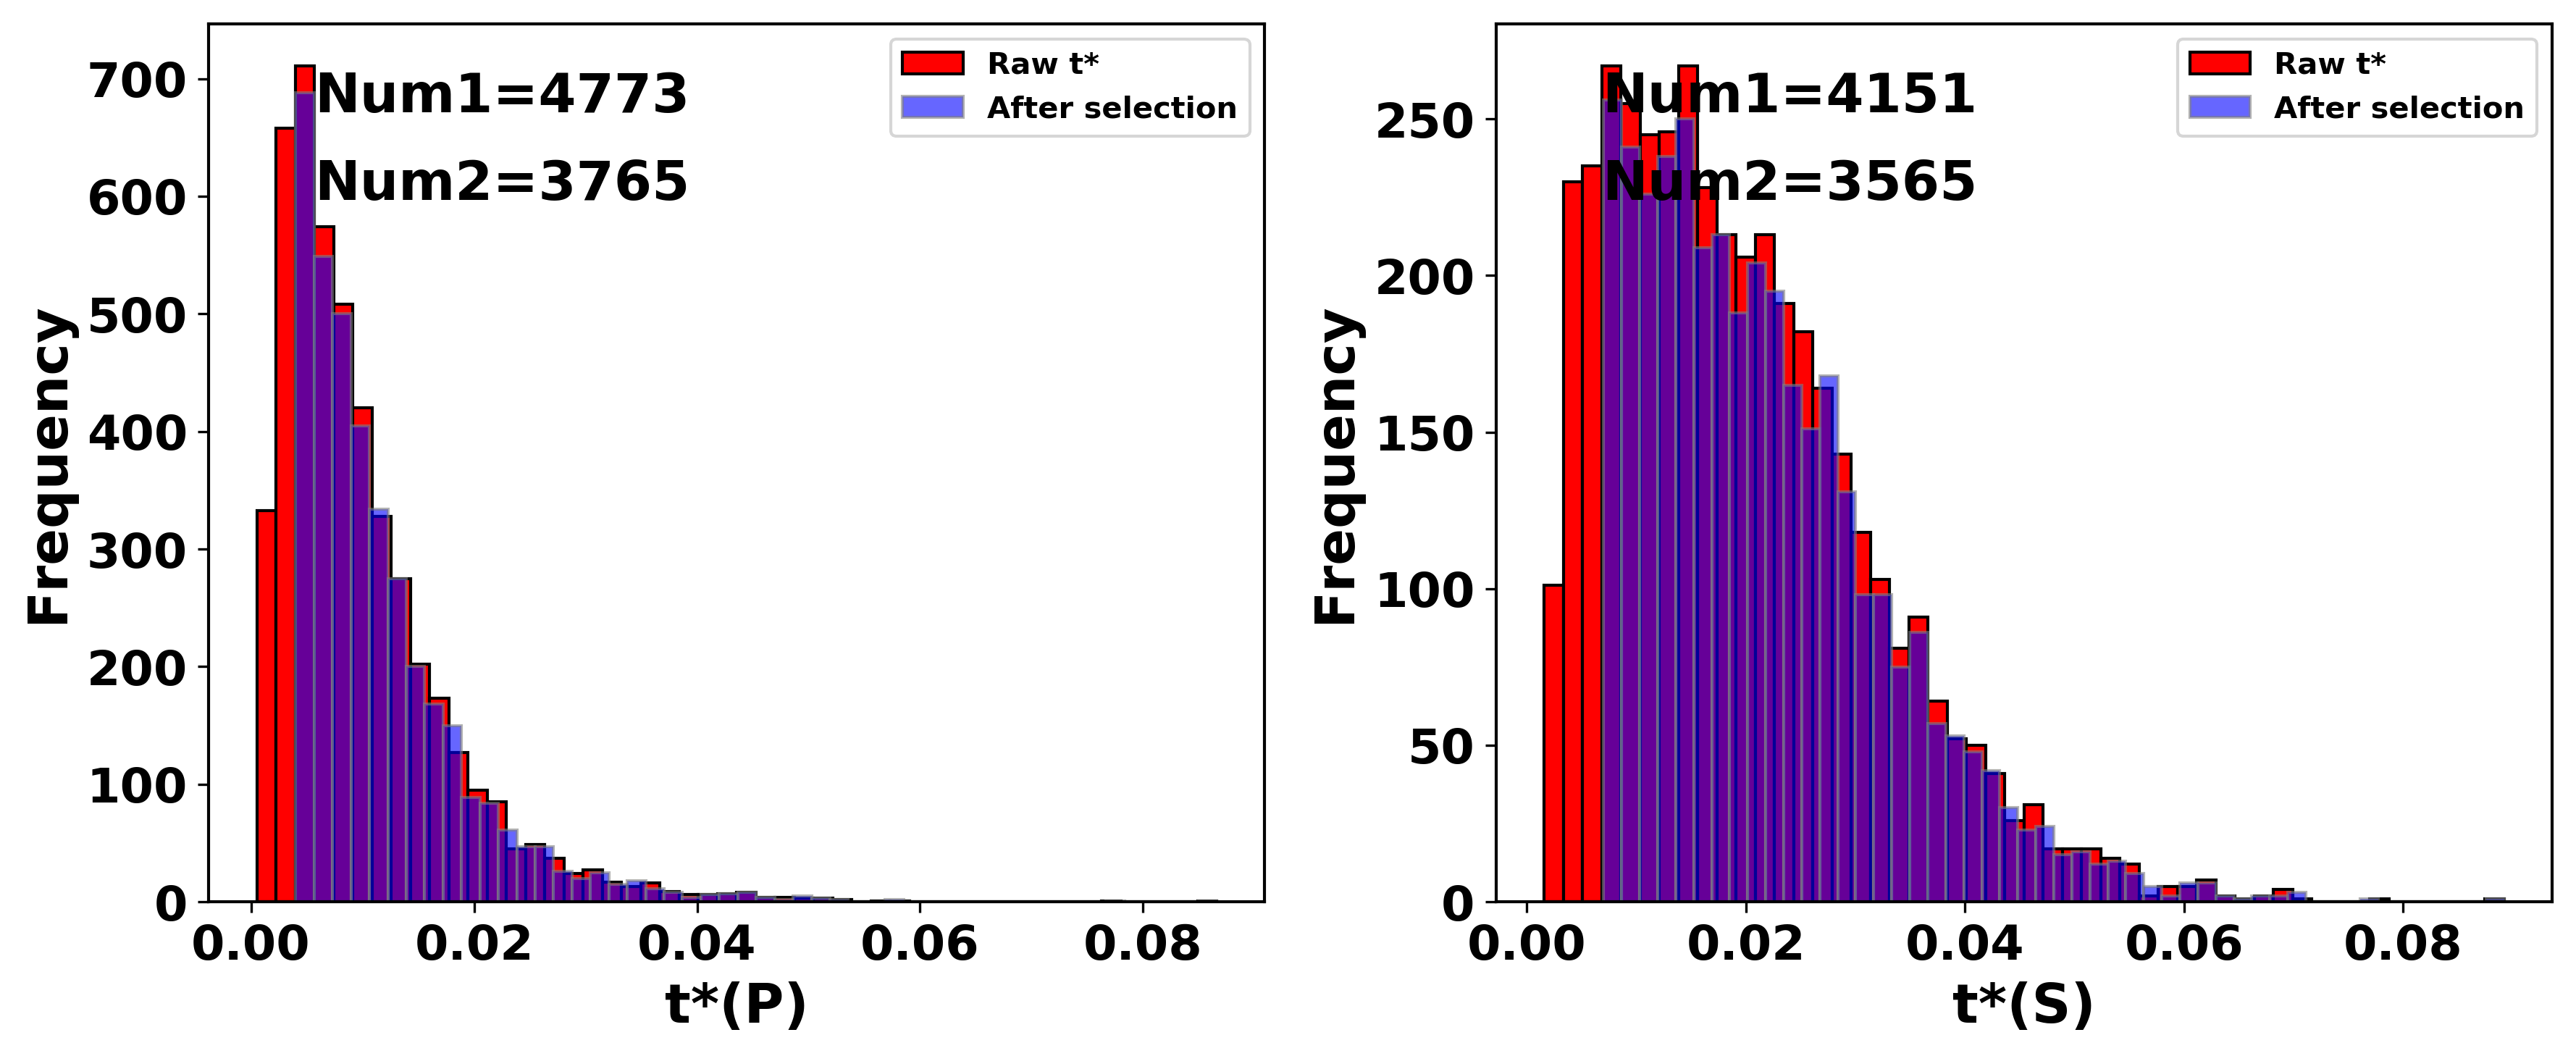

In [19]:
#plot histogram of P tstar and S tstar before and after selection
# read Ptstar
import os
import numpy as np
import matplotlib.pyplot as plt
def readTstar(filename,mintstar):
    with open(filename,'r') as f:
        tstar=[]
        temp=f.read().splitlines()
        for lin in temp:
            line=lin.split()
            if line[0]=="#":
                evid=line[1]
            else:
                staname=line[0]
                t=float(line[1])
                qual=line[2]
                phase=line[3]
                if t>mintstar:
                    tstar.append(t)
        return np.array(tstar)
filenameP="../1PlotStationTstarMeasurements/Output/P_tstar_selected.dat" #tstar_P_SNR3_2.56s.dat"
filenameS="../1PlotStationTstarMeasurements/Output/S_tstar_selected.dat"

Ptstar_old=readTstar(filenameP,-999)
Ststar_old=readTstar(filenameS,-999)

Ptstar_new=readTstar(filenameP,0.004)
Ststar_new=readTstar(filenameS,0.007)

plt.figure(1,figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(Ptstar_old,color='red',edgecolor='black',alpha=1,label='Raw t*')
plt.hist(Ptstar_new,color='blue',edgecolor='grey',alpha=0.6,label='After selection')
plt.legend(loc=1)
plt.xlabel('t*(P)')
plt.ylabel('Frequency')
plt.annotate('Num1={:d}'.format(len(Ptstar_old)), xy=(0.1, 0.9), xycoords='axes fraction',fontsize=18)
plt.annotate('Num2={:d}'.format(len(Ptstar_new)), xy=(0.1, 0.8), xycoords='axes fraction',fontsize=18)
plt.subplot(1,2,2)
plt.hist(Ststar_old,color='red',edgecolor='black',alpha=1,label='Raw t*')
plt.hist(Ststar_new,color='blue',edgecolor='grey',alpha=0.6,label='After selection')
plt.legend(loc=1)
plt.annotate('Num1={:d}'.format(len(Ststar_old)), xy=(0.1, 0.9), xycoords='axes fraction',fontsize=18)
plt.annotate('Num2={:d}'.format(len(Ststar_new)), xy=(0.1, 0.8), xycoords='axes fraction',fontsize=18)
plt.xlabel('t*(S)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('PandSTstarHistogram.png')
plt.pause(0.1)
 